<a href="https://colab.research.google.com/github/renardelyon/Deep-Learning-with-Python-Exercise/blob/main/Classifying_newswires_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from tensorflow.keras.datasets import reuters

(train_features,train_label),(test_features,test_label)=reuters.load_data(num_words=10000)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [18]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()])
word_encoder = ' '.join([reverse_word_index.get(i-3,'?') for i in train_features[0]])

In [19]:
import numpy as np

def vectorize_sequences (sequences,dimension = 10000):
  result = np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    result[i,sequence]=1
  return result

X_train = vectorize_sequences(train_features)
X_test = vectorize_sequences(test_features)
y_train = vectorize_sequences(train_label,dimension=46)
y_test = vectorize_sequences(test_label,dimension=46)

In [13]:
import numpy as np
x = np.zeros((10,10))

In [58]:
import tensorflow as tf

model = tf.keras.Sequential([
        tf.keras.layers.Dense(128,activation='relu', input_shape=[X_train.shape[1]]),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(46,activation='softmax')
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 128)               1280128   
_________________________________________________________________
dense_26 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_27 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_28 (Dense)             (None, 46)                2990      
Total params: 1,295,534
Trainable params: 1,295,534
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(loss='categorical_crossentropy',
              metrics='accuracy')

In [60]:
history = model.fit(X_train,
                    y_train,
                    epochs=9,
                    validation_split=0.2,
                    shuffle=True,
                    batch_size=128).history

Epoch 1/9
57/57 [==============================] - 2s 29ms/step - loss: 2.3385 - accuracy: 0.4867 - val_loss: 1.3226 - val_accuracy: 0.6784
Epoch 2/9
57/57 [==============================] - 1s 26ms/step - loss: 0.9494 - accuracy: 0.7839 - val_loss: 1.0591 - val_accuracy: 0.7568
Epoch 3/9
57/57 [==============================] - 1s 26ms/step - loss: 0.5666 - accuracy: 0.8664 - val_loss: 1.5145 - val_accuracy: 0.6594
Epoch 4/9
57/57 [==============================] - 1s 26ms/step - loss: 0.3834 - accuracy: 0.9116 - val_loss: 0.9756 - val_accuracy: 0.7958
Epoch 5/9
57/57 [==============================] - 1s 26ms/step - loss: 0.2346 - accuracy: 0.9485 - val_loss: 1.1060 - val_accuracy: 0.7780
Epoch 6/9
57/57 [==============================] - 2s 27ms/step - loss: 0.1833 - accuracy: 0.9552 - val_loss: 1.0856 - val_accuracy: 0.8030
Epoch 7/9
57/57 [==============================] - 1s 26ms/step - loss: 0.1531 - accuracy: 0.9596 - val_loss: 1.1462 - val_accuracy: 0.7947
Epoch 8/9
57/57 [===

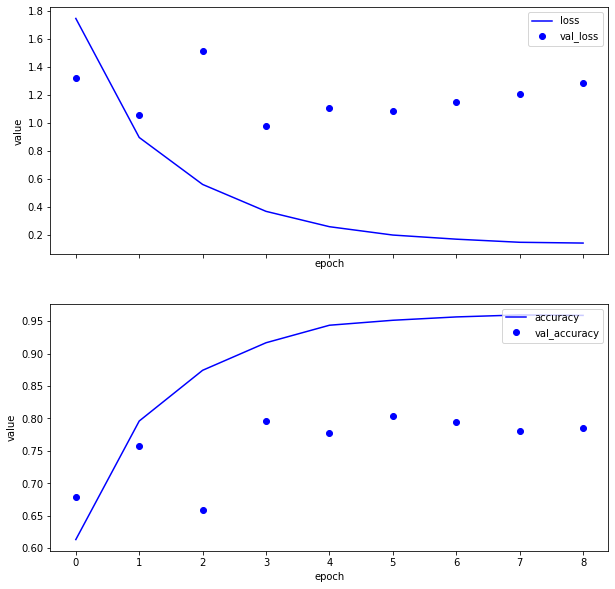

In [61]:
import matplotlib.pyplot as plt

loss = history['loss']
val_loss = history['val_loss']
accuracy = history['accuracy']
val_accuracy = history['val_accuracy']

fig, ax = plt.subplots(2,1,sharex=True,figsize=(10,10))

epoch = range(len(loss))
ax[0].plot(epoch,loss,'b-',label='loss')
ax[0].plot(epoch,val_loss,'bo',label='val_loss')
ax[1].plot(epoch,accuracy,'b-',label='accuracy')
ax[1].plot(epoch,val_accuracy,'bo',label='val_accuracy')
for axs in ax.flat:
    axs.set(xlabel='epoch', ylabel='value')
ax[0].legend(loc=1)
ax[1].legend(loc=1)
plt.show()

In [62]:
result = model.evaluate(X_test,y_test)
print(f'loss:{result[0]}\naccuracy:{result[1]}')

71/71 [==============================] - 0s 3ms/step - loss: 1.3369 - accuracy: 0.7769
loss:1.336905598640442
accuracy:0.7769367694854736
